# Domain walls (new, work in progress)


```{include} live.md
```


In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


Note: you may need to restart the kernel to use updated packages.


In [2]:
# %load glsp.py
# glsp.py: code to solve GL BVP and plot psi and b.

import numpy as np
from scipy.integrate import solve_bvp,quad
import matplotlib.pyplot as plt

def nat(x,h): # natural BC with applied magnetizing field h
  def BC(Y):
    return [Y[1],Y[3]-h]
  return (x,BC)

def inf(x): # 'infinity' BC with b=da=0 f=1 or 0 at x='infinity'
  def BC(Y):
    return [Y[1],Y[3]]
  return (x,BC)

def nrm(x,r,h): # normal metal BC with parameter r.
  def BC(Y):
    return [Y[1]-r*Y[0],Y[3]-h]
  return (x,BC)

def SCP(x): # superconducting psi=1,b proportional to exp(-x), for x going to +infinity.
  def BC(Y):
    return [Y[1]+2**(1/2)*kappa*(Y[0]-1),Y[3]+Y[2]]
  return (x,BC)

def NCM(x,h): # normal psi=0 with applied field h
  def BC(Y):
    r2=Y[2]**2+Y[0]**2-1
    return [Y[1]-kappa*r2**(1/2)*Y[0],Y[3]-h]
  return (x,BC)

def glsol(kappa,A,B):
  xa,AB=A
  xb,BB=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array(AB(Ya)+BB(Yb))
  rng=[xa, xb]
  X = np.linspace(*rng, nodes)
  Y0=[1 if x<0 else 1 for x in X]
  Y = np.vstack([Y0,np.zeros((3, X.size))])
  return solve_bvp(dY, bc, X, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  x_plot = np.linspace(A[0],B[0], 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot,label=f"$\psi: {tex}$")
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
  if not sol.success:
    print(f"kappa={kappa},tex={tex}:",sol.message)

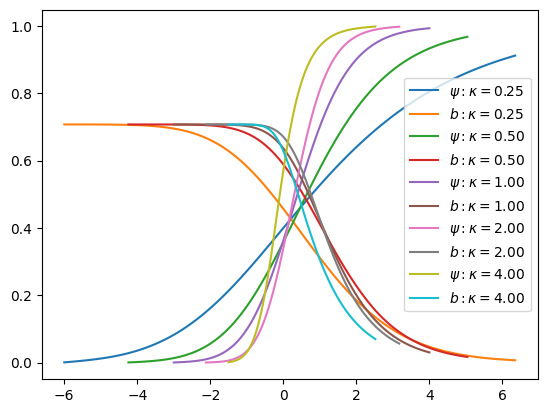

In [3]:
h0=1/2**(1/2)
for k in range(-2,3):
  kappa=2**k
  glplot(kappa,nrm(-3/kappa**(1/2),20,h0),SCP(4/kappa**(1/3)),f"\kappa={kappa:.2f}")
plt.legend()
plt.show()

kappa=2,tex=\kappa=2.00: The maximum number of mesh nodes is exceeded.


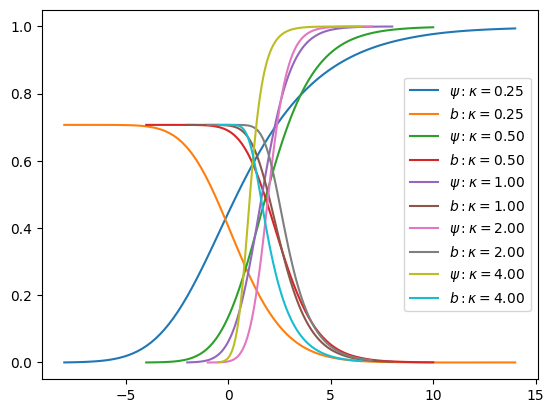

In [4]:
for k in range(-2,3):
  kappa=2**k
  glplot(kappa,nrm(-2/kappa,10,h0),SCP(6+2/kappa),f"\kappa={kappa:.2f}")
plt.legend()
plt.show()

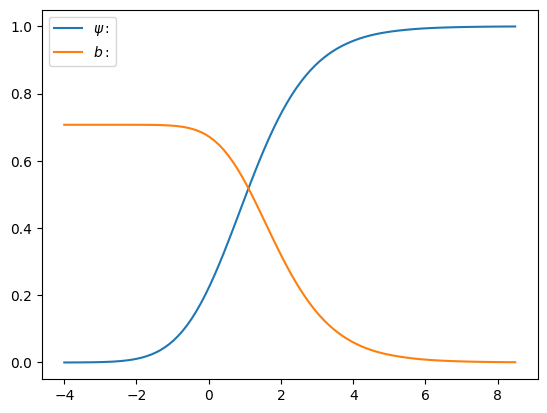

In [5]:
kappa=1/2**(1/2)
glplot(kappa,nrm(-4,40,h0),SCP(6/kappa),f"")

plt.legend()

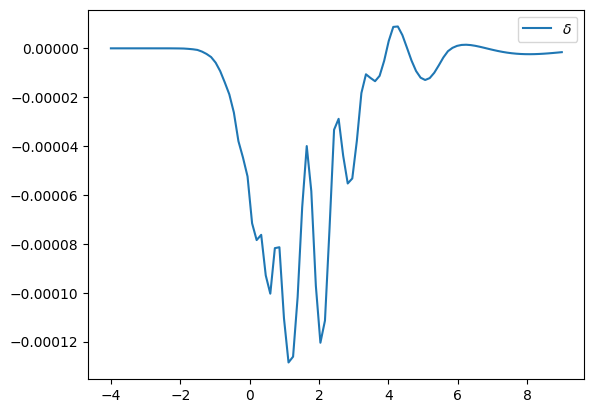

In [6]:
def fnplot(fn,xa,xb,tex):
  X = np.linspace(xa,xb,100)
  F=fn(X)
  plt.plot(X,F,label=f"${tex}$")

kappa,hc=1/2**(1/2),1/2**(1/2)
sol=glsol(kappa,nrm(-4,40,hc),SCP(9))
def f(x):
  return sol.sol(x)[0]
def b(x):
  return sol.sol(x)[3]

def d(x):
  return -f(x)**4/2+(b(x)-hc)**2
#fnplot(f,-4,9,"\psi")
#fnplot(b,-4,9,"b")
fnplot(d,-4,9,"\delta")
plt.legend()

/tmp/ipykernel_5772/2333296611.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(g,A[0],B[0])


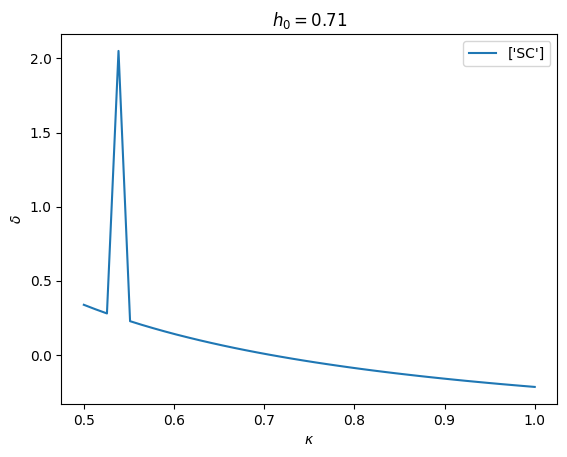

In [7]:
def dG1ABA(kappa,h0,A,B):
  sol=glsol(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**4/2+(da-h0)**2  
  return quad(g,A[0],B[0])

h0=1/2**(1/2)
Kappa=np.linspace(.5,1,40)
plot=[dG1ABA(kappa,h0,nrm(-4,40,h0),SCP(20))[0] for kappa in Kappa]
plt.plot(Kappa,plot,label=["SC"])
plt.xlabel("$\kappa$")
plt.ylabel("$\delta$")
plt.title(f"$h_0={h0:.2f}$")
plt.legend()
plt.show()

The $\delta$ scaled energy quantity going negative for high $\kappa$ indicates that &lsquo;domain walls&rsquo; become energeticallly favourable, allowing regions of flux to penetrate the superconductor. This is known as &lsquo;Type II&rsquo; behavior. For low $\kappa$ one has a &lsquo;Type I&rsquo; superconductor, where the no flux penetration is allowed, and the critical field $h_c$ is sharp at $1/\sqrt2$ for the scaled theory.